In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_traffic = pd.read_csv("accidents_2012_to_2014.csv") # csv den data okuyoruz
df_traffic.head() # ilk beş satır

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


<Axes: title={'center': 'Yıllara Göre Kaza Sayısı'}, xlabel='Year'>

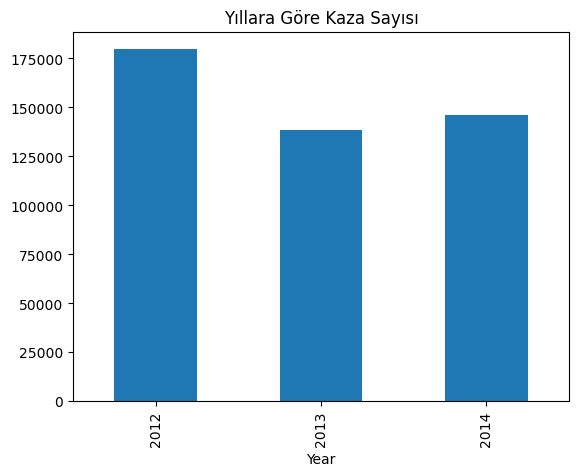

In [5]:
df_traffic["Year"].value_counts().sort_index().plot(kind="bar", title="Yıllara Göre Kaza Sayısı") # burada year verisini çekerek value_count fonksiyonu ile her yıldan kaç satır olduğunu saydırıyoruz. Böylece yıllara göre kaza sayısını elde etmiş olduk. platlib ile bar grafiği oluşturuyoruz.

<Axes: title={'center': 'Kaza Ciddiyeti Dağılımı'}, ylabel='count'>

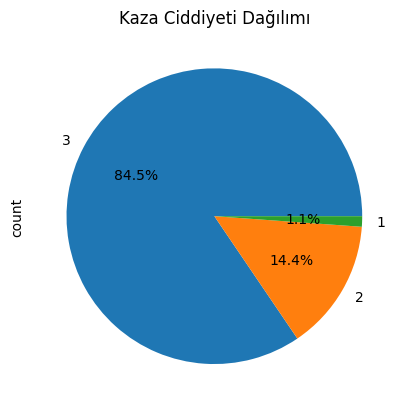

In [6]:
df_traffic["Accident_Severity"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Kaza Ciddiyeti Dağılımı") # accident_severity verisini value_count ile saydırarak kaza ciddiyeti sayısını alıyoruz.

<Axes: title={'center': 'Haftanın Günlerine Göre Kaza Sayısı'}, xlabel='Day_of_Week'>

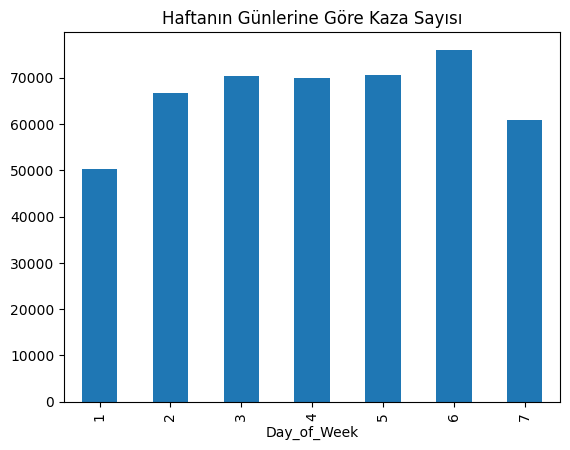

In [7]:
df_traffic["Day_of_Week"].value_counts().sort_index().plot(kind="bar", title="Haftanın Günlerine Göre Kaza Sayısı") # day of week verisini value_count ile unique olarak saydırarak kaza kayıtlarının hangi günlerde olduğu bilgisini sayıyoruz.  

<Axes: title={'center': 'Işık Koşullarına Göre Kaza Sayısı'}, ylabel='Light_Conditions'>

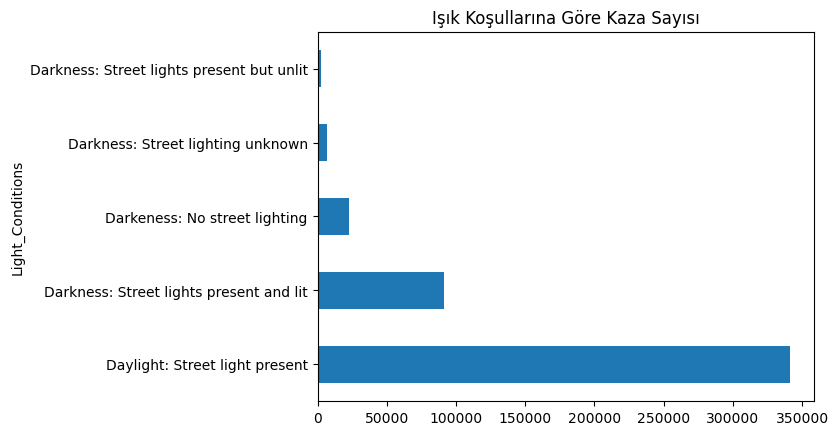

In [8]:
df_traffic["Light_Conditions"].value_counts().plot(kind="barh", title="Işık Koşullarına Göre Kaza Sayısı") # light conditions verisini value count ile saydırarak ışık koşullarını sayıyoruz. barh : horizontal bars

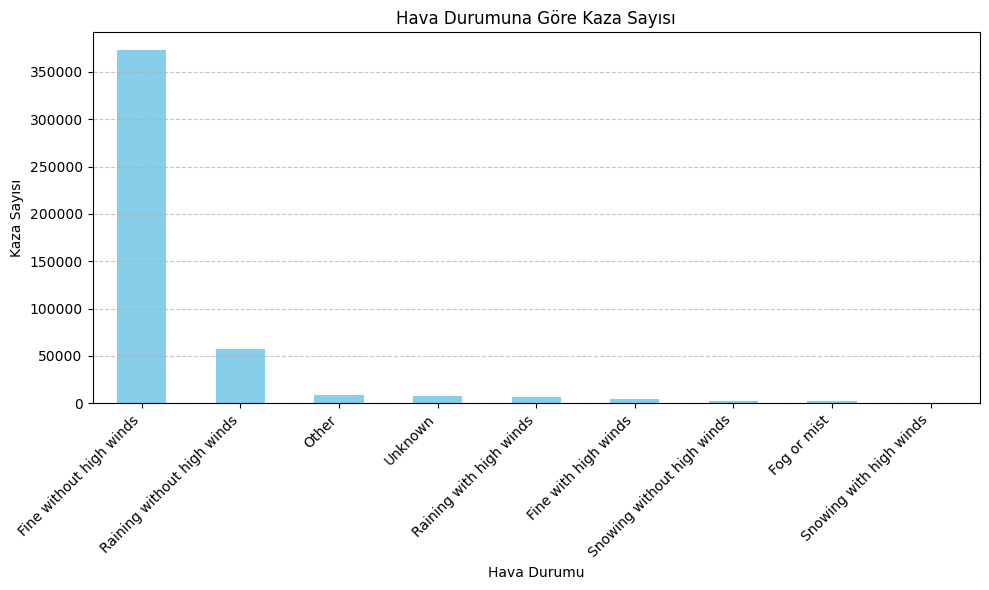

In [10]:
#Eksik verileri dışlayarak hava durumuna göre kaza sayısını hesaplıyoruz.
weather_counts = df_traffic["Weather_Conditions"].value_counts()

#Bar grafiği çiziyoruz.
plt.figure(figsize=(10, 6))
weather_counts.plot(kind="bar", color="skyblue")
plt.title("Hava Durumuna Göre Kaza Sayısı")
plt.xlabel("Hava Durumu")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Saat Bazında Kaza Dağılımı'}, xlabel='Hour'>

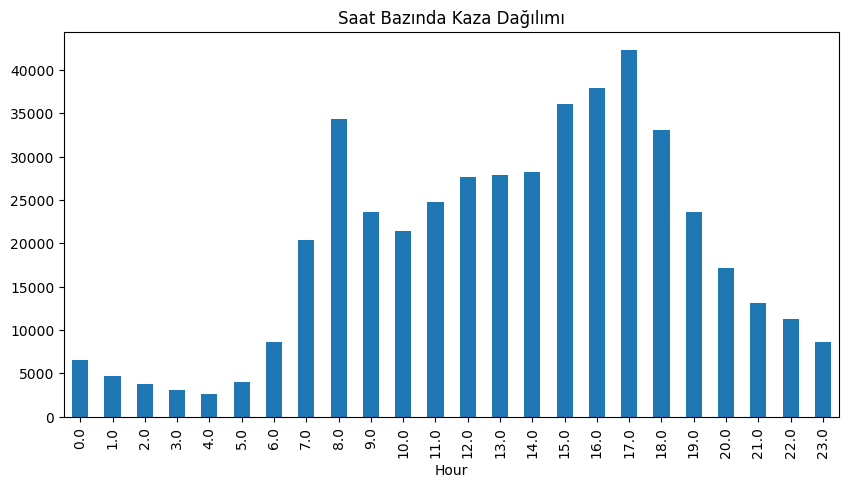

In [11]:
# Saat bilgisini alıyoruz.
df_traffic["Hour"] = pd.to_datetime(df_traffic["Time"], errors="coerce").dt.hour

# Saat bazında kaza sayısı
df_traffic["Hour"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), title="Saat Bazında Kaza Dağılımı")

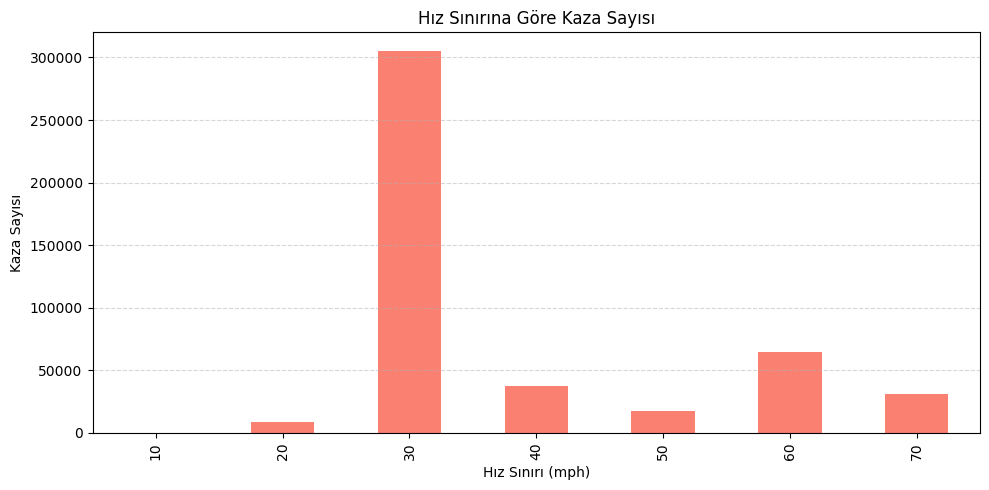

In [16]:
#Hız Sınırına Göre Kaza Sayısı
plt.figure(figsize=(10, 5))
df_traffic["Speed_limit"].value_counts().sort_index().plot(kind="bar", color="salmon")
plt.title("Hız Sınırına Göre Kaza Sayısı")
plt.xlabel("Hız Sınırı (mph)")
plt.ylabel("Kaza Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

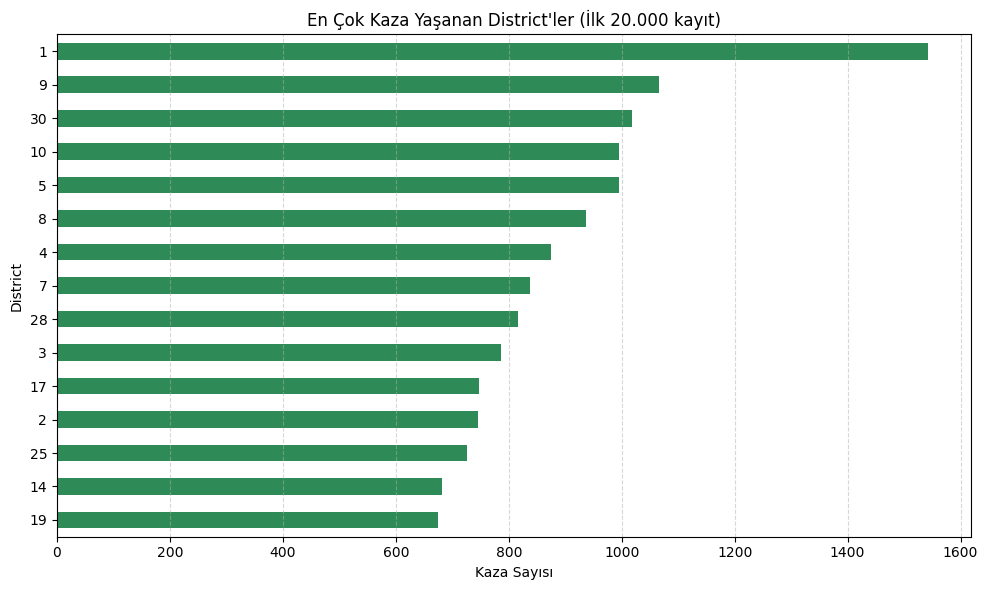

In [17]:
#En Çok Kaza Yaşanan District'ler (top 15)
top_districts = df_subset["Local_Authority_(District)"].value_counts().head(15)

plt.figure(figsize=(10, 6))
top_districts.plot(kind="barh", color="seagreen")
plt.title("En Çok Kaza Yaşanan District'ler (İlk 20.000 kayıt)")
plt.xlabel("Kaza Sayısı")
plt.ylabel("District")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()